In [859]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 15,12

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [860]:
df_train = pd.read_csv(r'C:\Users\Aditi\Downloads\Train_UWu5bXk.txt')

In [861]:
df_train.shape

(8523, 12)

In [862]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2573,FDU46,10.30,Regular,0.018623,Snack Foods,87.8540,OUT010,1998,NaN,Tier 3,Grocery Store,259.6620
3161,DRB25,12.30,Low Fat,0.069402,Soft Drinks,107.9938,OUT013,1987,High,Tier 3,Supermarket Type1,2036.6822
3777,FDQ57,NaN,Low Fat,0.027812,Snack Foods,147.4760,OUT027,1985,Medium,Tier 3,Supermarket Type3,3368.9480
5302,FDQ09,NaN,Low Fat,0.057851,Snack Foods,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,4376.9692
3832,DRF27,8.93,Low Fat,0.028461,Dairy,152.2340,OUT049,1999,Medium,Tier 1,Supermarket Type1,5053.4220


In [863]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [864]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4024,NCN53,5.175,Low Fat,0.030527,Health and Hygiene,33.5874,OUT017,2007,NaN,Tier 2,Supermarket Type1,635.1732
6404,FDA56,NaN,Low Fat,0.008722,Fruits and Vegetables,123.5414,OUT027,1985,Medium,Tier 3,Supermarket Type3,4508.1318
990,NCY05,13.500,Low Fat,0.054990,Health and Hygiene,35.2874,OUT046,1997,Small,Tier 1,Supermarket Type1,741.0354
1202,FDG33,5.365,Regular,0.140525,Seafood,172.7764,OUT045,2002,NaN,Tier 2,Supermarket Type1,2233.0932
7808,FDP40,4.555,Regular,0.034329,Frozen Foods,110.1544,OUT013,1987,High,Tier 3,Supermarket Type1,1230.3984


In [865]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [866]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [867]:
df_train[df_train['Item_Identifier'] == "FDP10"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


#Let us divide the variables into their respective data types

# Independent Variable

### UniqueID:

1. Item_Identifier : Unique ID for each item of data 

### Contnious Variables:

1. Item_Weight
2. Item_Visibility
3. Item_MRP

### Ordinal Variables:

1. Outlet_Establishment_Year

### Categorical Variables:

1. Item_Fat_Content 
2. Item_Type
3. Outlet_Size 
4. Outlet_Location_Type
5. Outlet_Type
6. Outlet_Identifier

# Dependent Variable

### Continuous Varibale:
1. Item_Outlet_Sales 

#### Item_Outlet_Sales

In [868]:
df_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

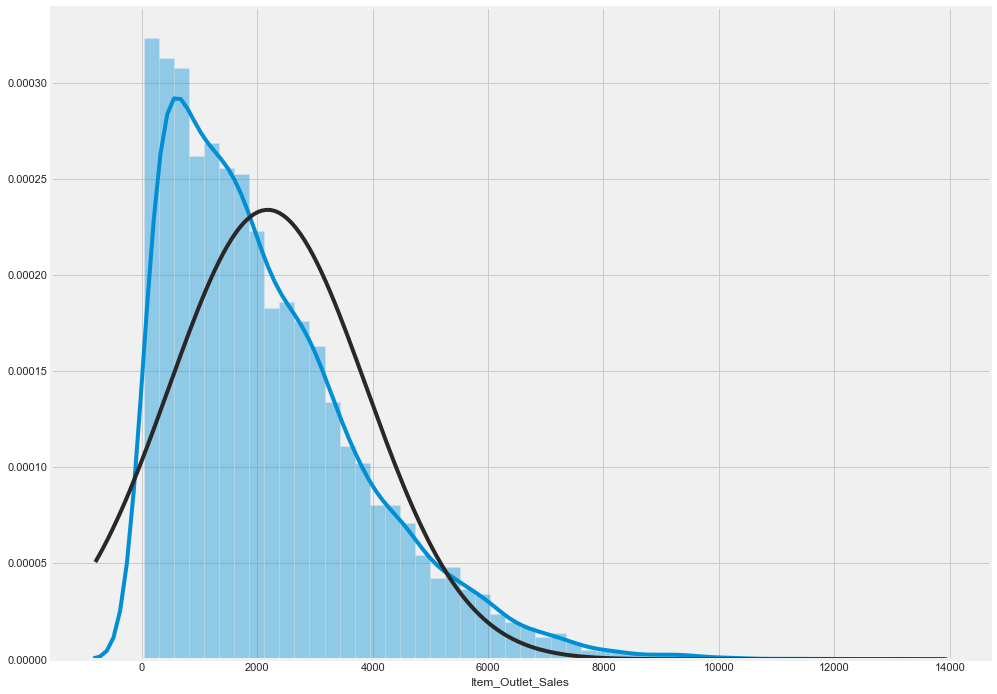

In [869]:
#histogram
from scipy.stats import norm

sns.distplot(df_train['Item_Outlet_Sales'], fit= norm)

In [870]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [884]:
#histogram
from scipy.stats import norm

data = scaler.fit(df_train['Item_Outlet_Sales'])
sns.distplot(data.reshape(-1,1), fit= norm)

ValueError: Expected 2D array, got 1D array instead:
array=[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [703]:
print("Skewness: %f" % df_train['Item_Outlet_Sales'].skew())
print("Kurtosis: %f" % df_train['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtosis: 1.615877


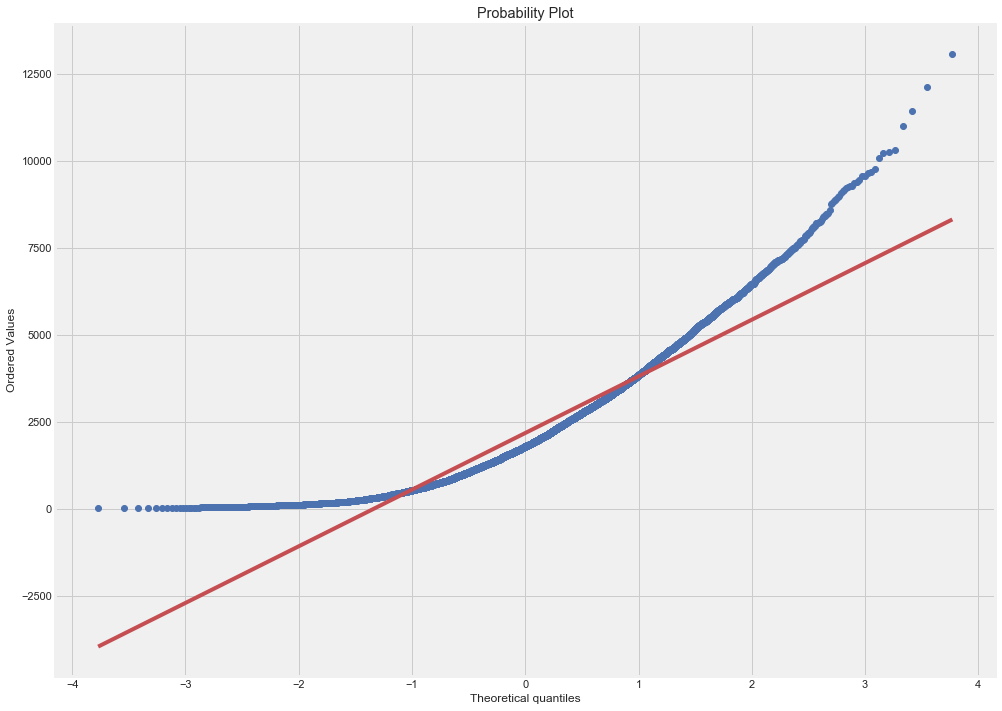

In [704]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(df_train['Item_Outlet_Sales'], plot=plt)

In [705]:
from scipy.stats import boxcox

# Log transform
data = np.sqrt(df_train['Item_Outlet_Sales'] )

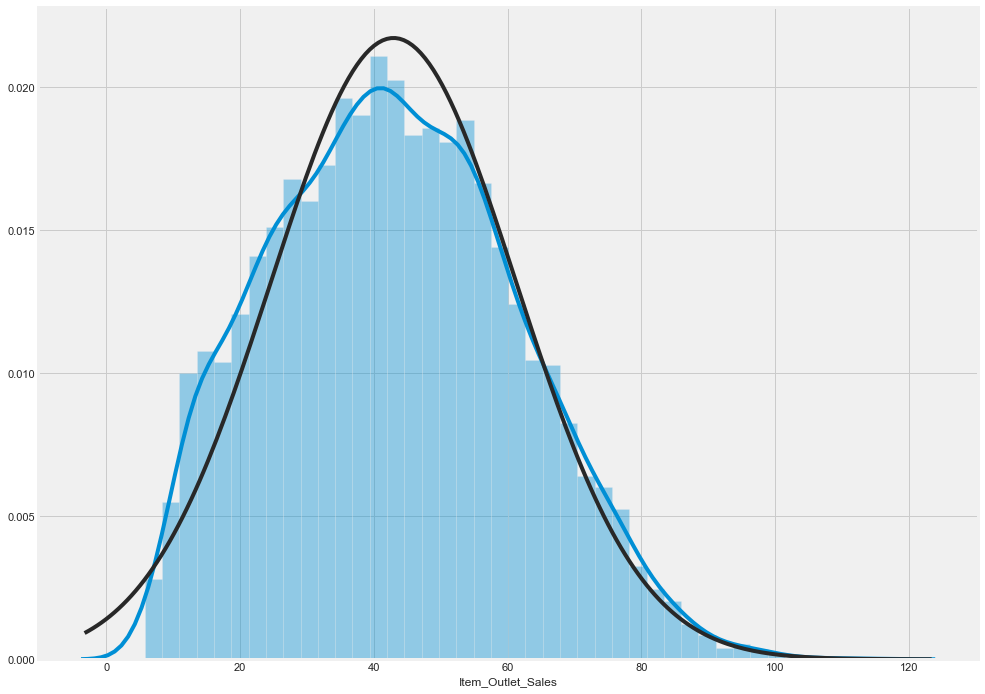

In [706]:
sns.distplot(data, fit= norm)

In [707]:
print("Skewness: %f" % pd.DataFrame(data).skew())
print("Kurtosis: %f" % pd.DataFrame(data).kurt())

Skewness: 0.234676
Kurtosis: -0.449294


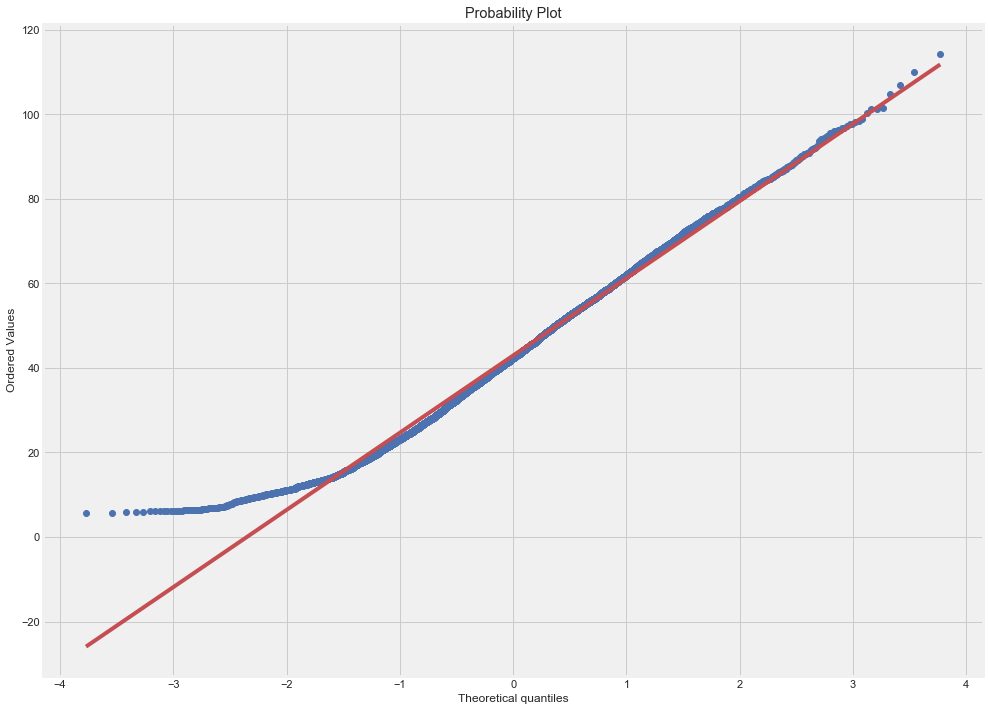

In [708]:
fig = plt.figure()
res = stats.probplot(data, plot=plt)

#### Contnious Variables Vs Target Varibale

In [709]:
df_train['Join_Both_Columns'] = df_train['Item_Identifier']+ str(" ")+ df_train['Outlet_Type']

In [710]:
df_train['Count_By_Both'] = df_train['Item_Identifier'].groupby(df_train['Join_Both_Columns']).transform('count')

In [711]:
df_train['Count_By_Item'] = df_train['Item_Identifier'].groupby(df_train['Item_Identifier']).transform('count')

In [712]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Join_Both_Columns,Count_By_Both,Count_By_Item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15 Supermarket Type1,5,8
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01 Supermarket Type2,1,6
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15 Supermarket Type1,3,7
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07 Grocery Store,1,6
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19 Supermarket Type1,5,6


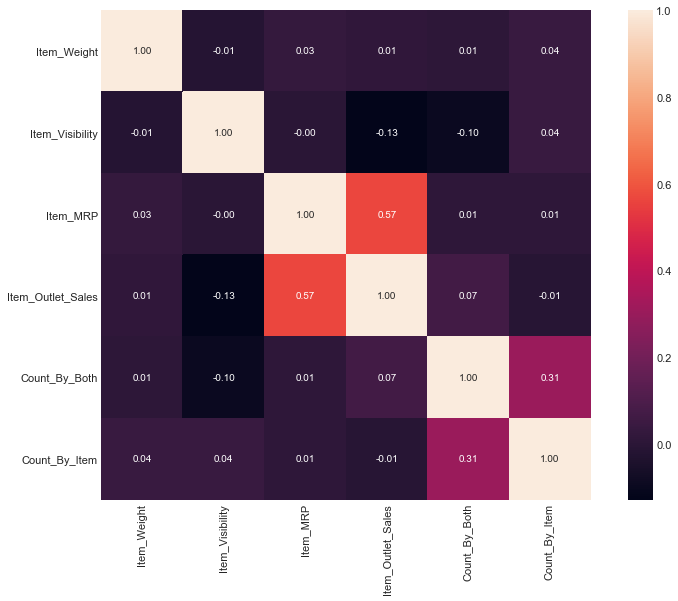

In [713]:
#correlation matrix
corrmat = df_train[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Count_By_Both','Count_By_Item']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

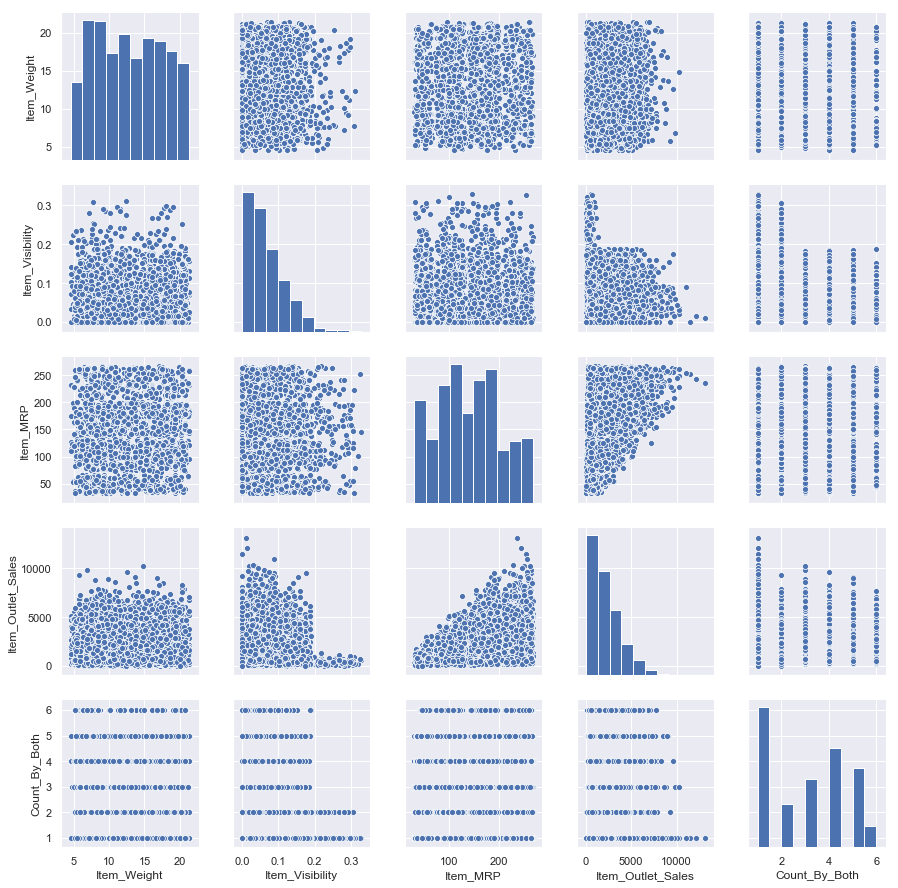

In [714]:
#scatterplot
sns.set()
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Count_By_Both']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

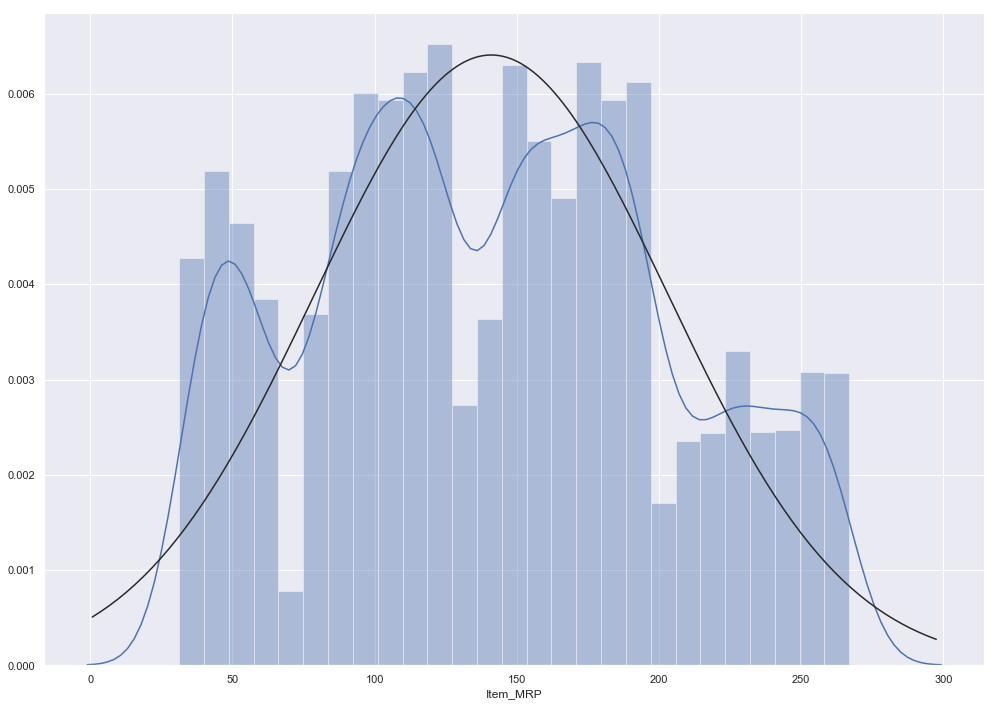

In [715]:
sns.distplot(df_train['Item_MRP'], fit= norm)

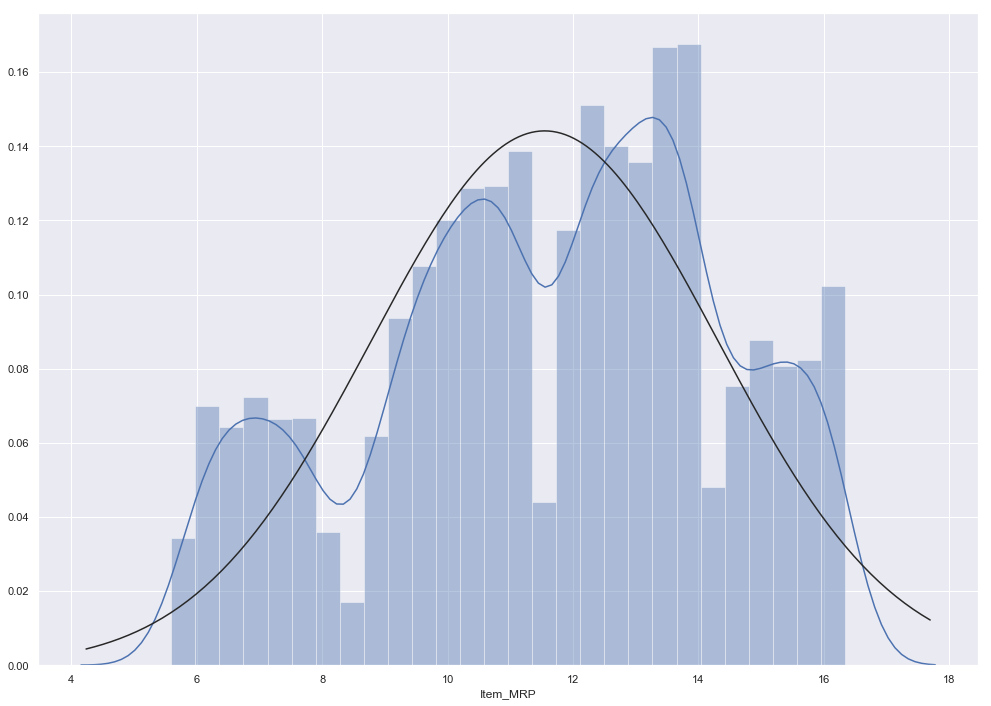

In [716]:
sns.distplot(np.sqrt(df_train['Item_MRP']), fit= norm)

In [717]:
np.corrcoef(np.sqrt(df_train['Item_Outlet_Sales']),np.sqrt(df_train['Item_MRP']) )

array([[1.        , 0.56881295],
       [0.56881295, 1.        ]])

#### Categorical Variables (vs) Item_Outlet_Sales

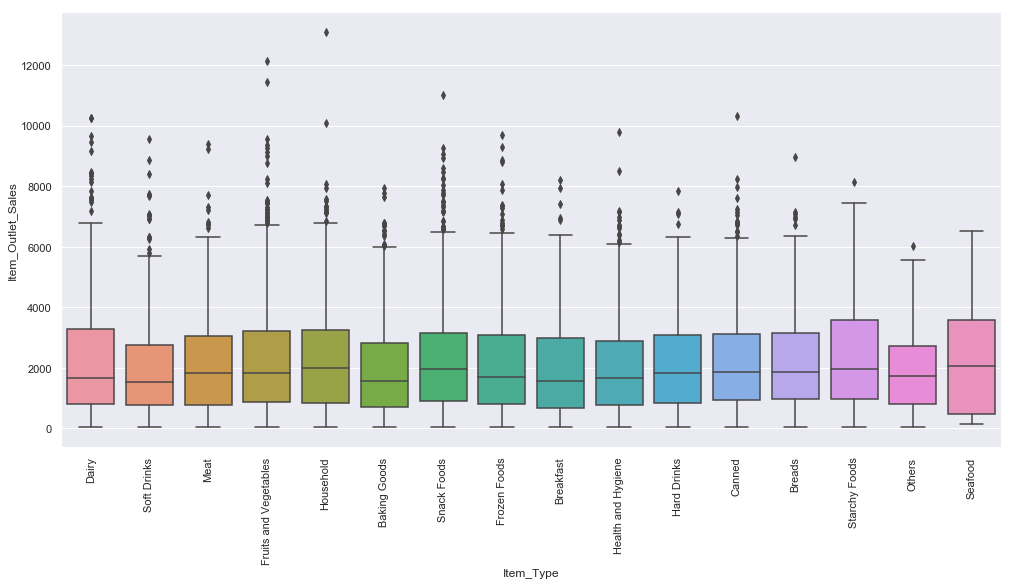

In [718]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data = df_train)

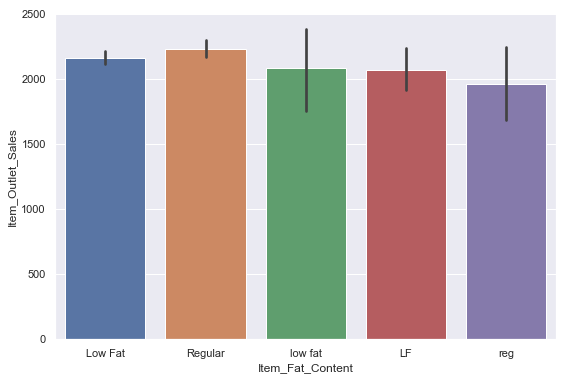

In [719]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)

sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data = df_train)

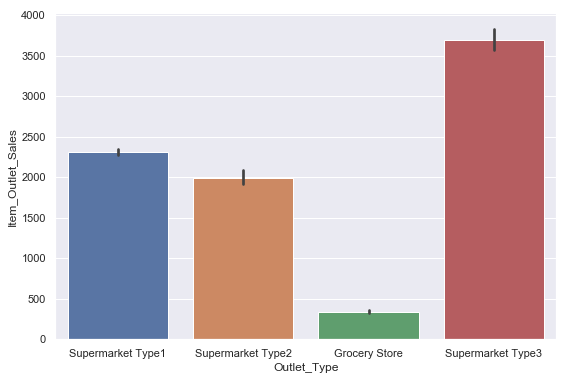

In [720]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data = df_train)

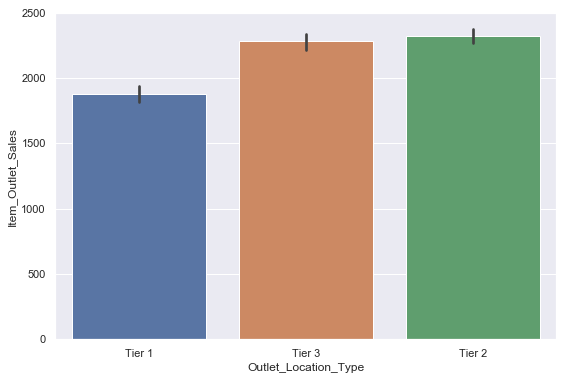

In [721]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data = df_train)

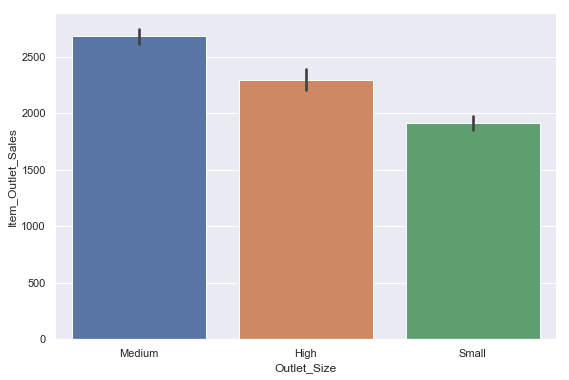

In [722]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data = df_train)

#### Ordinal Varibles Vs Target Varible

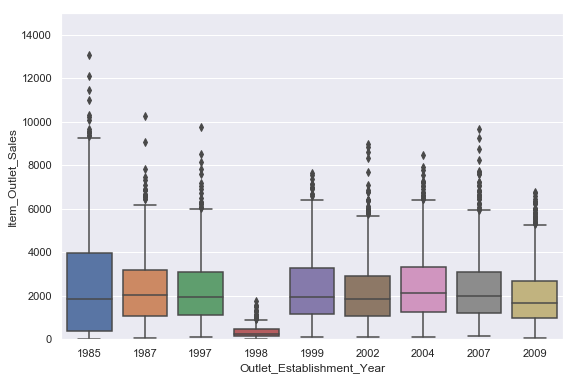

In [723]:
var = 'Outlet_Establishment_Year'
data = pd.concat([df_train['Item_Outlet_Sales'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data)
fig.axis(ymin=0, ymax=15000);  

#### Data Cleaning

In [724]:
df_train['Outlet_Years_Passed'] = 2019 - df_train['Outlet_Establishment_Year']

In [725]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [726]:
stats.f_oneway(df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '10'], 
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '12'],
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '15'],
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '17'],
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '20'],
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '21'],
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '22'],
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '32'],
               df_train['Item_Outlet_Sales'][df_train['Outlet_Years_Passed'] == '34']
               )

F_onewayResult(statistic=nan, pvalue=nan)

In [727]:
results = ols('Item_Outlet_Sales ~ C(Outlet_Years_Passed)', data=df_train).fit()

In [728]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          6.74e-164
Time:                        18:41:20   Log-Likelihood:                -75131.
No. Observations:                8523   AIC:                         1.503e+05
Df Residuals:                    8514   BIC:                         1.503e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1995.4987     53.525     37.282      0.000    1890.577    2100.420
C(Outlet_Years_Passed)[T.12]   345.1765     75.736      4.558      0.000     196.715     493.638
C(Outlet_Years_Passed)[T.15]   443.3431     75.655      5.860      0.000     295.041     591.645
C(Outlet_Years_Passed)[T.17]   196.8861     75.675      2.602      0.009      48.544     345.228
C(Outlet_Years_Passed)[T.20]   352.8559     75.655      4.664      0.000     204.554     501.158
C(Outlet_Years_Passed)[T.21] -1656.1471     87.494    -18.929      0.000   -1827.657   -1484.637
C(Outlet_Years_Passed)[T.22]   282.3455     75.655      3.732      0.000     134.044     430.647
C(Outlet_Years_Passed)[T.32]   303.4965     75.614      4.014      0.000     155.274     451.719
C(Outlet_Years_Passed)[T.34]   488.1787     68.426      7.134      0.000     354.047     622.311
==============================================================================
Omnibus:                     1567.842   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2969.054
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       4.789   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [729]:
np.corrcoef(df_train['Item_Outlet_Sales'],df_train['Outlet_Years_Passed'] )

array([[1.        , 0.04913497],
       [0.04913497, 1.        ]])

Years passed has no effect on the sales

#### Item_Fat_content

In [730]:
Fat_Content = { 'low fat' : 'Low Fat', 
                  'LF' : 'Low Fat', 
                  'reg' : 'Regular'}

In [731]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map(Fat_Content)

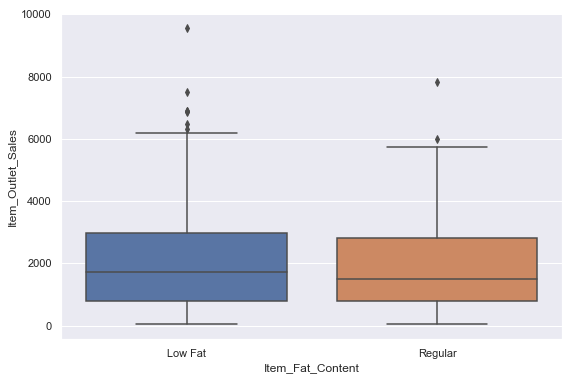

In [732]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (8, 6)

plt.subplot(1, 1, 1)
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data = df_train)

In [733]:
stats.ttest_ind(df_train['Item_Outlet_Sales'][df_train['Item_Fat_Content'] == 'Low Fat'], df_train['Item_Outlet_Sales'][df_train['Item_Fat_Content'] == 'Regular'])

Ttest_indResult(statistic=0.6975439066807714, pvalue=0.4857610294984669)

In [734]:
contingency_table = pd.crosstab(df_train['Item_Fat_Content'],df_train['Item_Type'],df_train['Item_Outlet_Sales'].values, aggfunc="mean",margins = True)

In [735]:
contingency_table

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item_Fat_Content,,,,,,,,,,,,,,,,,
Low Fat,1577.874664,1493.389400,817.6024,1948.106141,1851.811733,2487.940954,2193.318308,1942.182987,1907.175564,2371.027937,2695.642618,2232.734692,1405.63696,2097.567485,2032.497171,2381.633180,2077.264888
Regular,1089.504877,969.404800,1916.1724,2002.484291,3105.069267,2107.116832,2110.053360,NaN,NaN,NaN,2556.006200,NaN,NaN,1776.962304,1225.737800,2177.166000,1962.192268
All,1423.025707,1400.921529,1366.8874,1963.847184,2030.848524,2327.148547,2165.563325,1942.182987,1907.175564,2371.027937,2641.339567,2232.734692,1405.63696,1992.225783,2010.087189,2297.440812,2052.561225


In [736]:
f_obs = np.array([contingency_table.iloc[0][0:15].values,
                  contingency_table.iloc[1][0:15].values])

In [737]:
from scipy import stats

stats.chi2_contingency(f_obs)[0:3]

(nan, nan, 14)

In [ ]:
decision tree for interactive effects

We can conclude Item_Fat _Content will not be useful for our prediction

#### Missing Values

In [738]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

#### Encoding

In [739]:
X_cat = df_train.select_dtypes(include=['object'])

In [740]:
X_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Join_Both_Columns'],
      dtype='object')

In [741]:
X_cat = X_cat.drop(['Item_Identifier','Item_Fat_Content'],axis=1)

In [742]:
df_train = df_train.drop(['Item_Identifier','Item_Fat_Content'],axis=1)

In [743]:
X_enc = X_cat.copy()

#### Label Encoder

In [744]:
from sklearn.preprocessing import LabelEncoder

In [745]:
X_enc = X_enc.apply(LabelEncoder().fit_transform)

In [746]:
df_train = df_train.drop(X_cat.columns, axis=1)

In [747]:
FinalData = pd.concat([df_train,X_enc], axis=1)

In [748]:
FinalData['Item_MRP'] = FinalData['Item_MRP']**(1/2)

In [754]:
FinalData.sample(5)

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Count_By_Both,Count_By_Item,Outlet_Years_Passed,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Type
416,1.762789,15.480756,49.025891,4,5,15,15,6,2,1
4575,4.957988,10.492435,44.333301,2,3,15,5,6,2,1
5125,10.234983,7.418207,23.222791,3,6,20,6,9,1,1
2016,9.633718,11.192310,27.622578,5,8,12,5,2,1,1
6296,16.767231,11.146246,15.737776,1,5,21,6,0,1,0


In [750]:
FinalData = FinalData.drop(['Item_Weight','Outlet_Establishment_Year','Outlet_Location_Type','Join_Both_Columns'],axis=1)

In [751]:
FinalData['Item_Visibility'] = FinalData['Item_Visibility']*100

In [752]:
FinalData['Item_Outlet_Sales'] = FinalData['Item_Outlet_Sales']**(1/2)

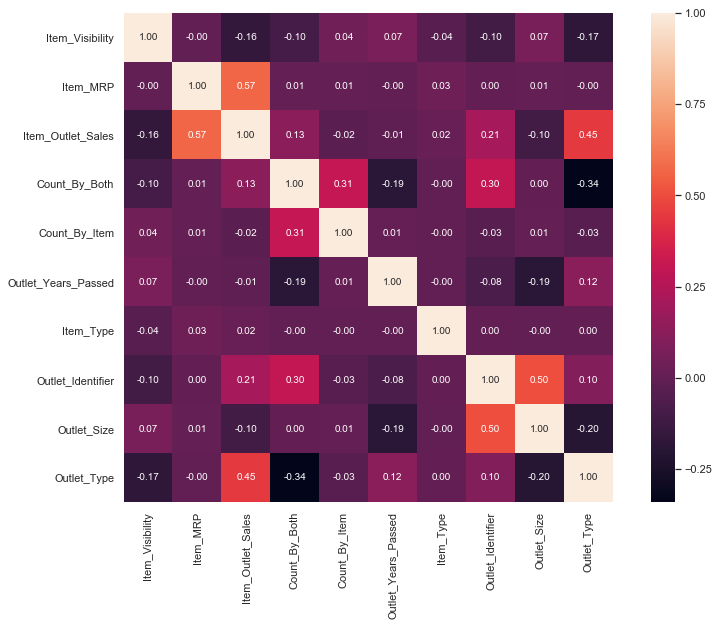

In [753]:
#correlation matrix
corrmat = FinalData.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

### Modelling

In [885]:
x = FinalData.drop(['Item_Outlet_Sales','Count_By_Both','Count_By_Item','Outlet_Identifier','Outlet_Size'],axis=1)

In [886]:
Outlet_Type_Bin = pd.get_dummies(x['Outlet_Type'])

In [887]:
x = pd.concat([x,Outlet_Type_Bin], axis=1)

In [888]:
x = x.drop(['Outlet_Type'],axis=1)

In [889]:
x.head(5)

,Item_Visibility,Item_MRP,Outlet_Years_Passed,Item_Type,0,1,2,3
0,1.604730,15.805354,20,4,0,1,0,0
1,1.927822,6.947604,10,14,0,0,1,0
2,1.676007,11.900336,20,10,0,1,0,0
3,0.000000,13.494258,21,6,1,0,0,0
4,0.000000,7.339033,32,9,0,1,0,0


In [936]:
y = FinalData['Item_Outlet_Sales']

In [937]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.24)

In [938]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(random_state = 0,max_depth=8, min_samples_leaf=150)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=150,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [939]:
y_pred = dtr.predict(x_val)

In [940]:
y_pred = y_pred*y_pred

In [941]:
y_val = y_val*y_val

In [942]:
y_val.max()

13086.964800000002

In [943]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = sqrt(mean_squared_error(y_val, y_pred))

In [944]:
print(rmse)

1114.7692928333292


In [945]:
np.corrcoef(y_val, y_pred)

array([[1.        , 0.76397171],
       [0.76397171, 1.        ]])

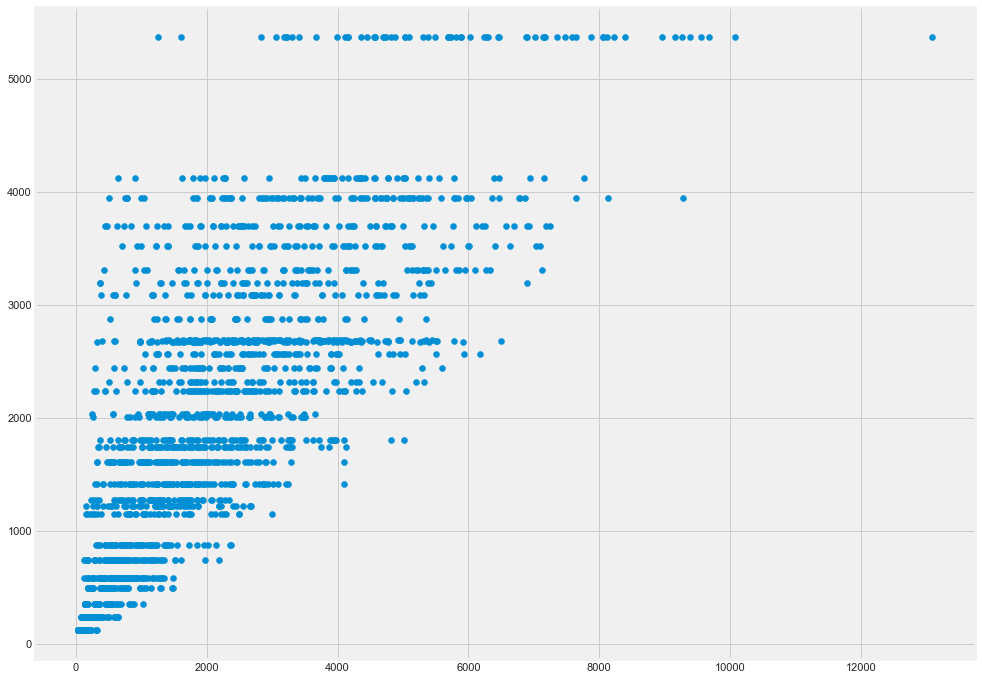

In [946]:
plt.scatter(y_val, y_pred)

In [947]:
from sklearn.metrics import r2_score

In [948]:
r2_score(y_val, y_pred)

0.5784845988420215

In [949]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [950]:
model1=sm.OLS(y_train,x_train)

In [905]:
result=model1.fit()

In [906]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:25:18   Log-Likelihood:                -24541.
No. Observations:                6477   AIC:                         4.910e+04
Df Residuals:                    6469   BIC:                         4.915e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Item_Visibility        -0.0228    

In [974]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.30)

In [975]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300,max_depth = 5 ,min_samples_leaf=100,n_jobs = 2, random_state = 42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=2,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [976]:
y_pred = rf.predict(x_val)

In [977]:
y_pred = y_pred*y_pred

In [978]:
y_val = y_val*y_val

In [979]:
y_pred.max()

5273.8747923314295

In [980]:
y_val.max()

10306.583999999999

In [981]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = sqrt(mean_squared_error(y_val, y_pred))

In [982]:
print(rmse)

1087.9383627803752


In [983]:
np.corrcoef(y_val, y_pred)

array([[1.        , 0.78984692],
       [0.78984692, 1.        ]])

In [984]:
from sklearn.metrics import r2_score

In [985]:
r2_score(y_val, y_pred)

0.6099777046813839

In [986]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [1027]:
importances

[0.00012859506941903062,
 0.5028527057894069,
 0.03841053428757882,
 5.67195496758072e-05,
 0.4255836617214482,
 0.0001115830094430983,
 2.4647001084596215e-05,
 0.03283155357194335]

In [832]:
# Saving feature names for later use
feature_list = list(x_train.columns)

In [833]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [834]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [835]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Item_MRP             Importance: 0.51
Variable:                    0 Importance: 0.41
Variable: Outlet_Years_Passed  Importance: 0.04
Variable:                    3 Importance: 0.03
Variable: Item_Visibility      Importance: 0.0
Variable: Item_Type            Importance: 0.0
Variable:                    1 Importance: 0.0
Variable:                    2 Importance: 0.0


### Dont go ahead

In [1012]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.30)

In [1014]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 300,max_depth = 5 ,min_samples_leaf=100, random_state = 42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=100,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [1015]:
y_pred = gbr.predict(x_val)

In [1016]:
y_pred = y_pred*y_pred

In [1017]:
y_val = y_val*y_val

In [1018]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = sqrt(mean_squared_error(y_val, y_pred))

In [1019]:
print(rmse)

1091.1771880277495


In [1020]:
np.corrcoef(y_val, y_pred)

array([[1.        , 0.76027054],
       [0.76027054, 1.        ]])

In [1021]:
from sklearn.metrics import r2_score

In [1022]:
r2_score(y_val, y_pred)

0.5762379781016087

In [1025]:
gbr.feature_importances_

array([0.02267541, 0.49590285, 0.04436084, 0.00627323, 0.39496856,
       0.00151699, 0.00397891, 0.03032321])

In [1026]:
x.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Years_Passed', 'Item_Type', 0, 1,
       2, 3],
      dtype='object')

#### Test Data

In [987]:
df_test = pd.read_csv(r'C:\Users\Aditi\Downloads\Test_u94Q5KV.txt')

In [988]:
df_test.shape

(5681, 11)

In [989]:
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3879,FDN48,13.350,Low Fat,0.065318,Baking Goods,93.7804,OUT017,2007,NaN,Tier 2,Supermarket Type1
1536,FDA47,10.500,Regular,0.116652,Baking Goods,162.4210,OUT035,2004,Small,Tier 2,Supermarket Type1
3900,NCP02,7.105,Low Fat,0.044878,Household,59.7562,OUT049,1999,Medium,Tier 1,Supermarket Type1
1700,FDV25,5.905,Low Fat,0.045644,Canned,222.0456,OUT035,2004,Small,Tier 2,Supermarket Type1
5096,FDZ28,20.000,Regular,0.051483,Frozen Foods,128.8678,OUT035,2004,Small,Tier 2,Supermarket Type1


In [990]:
df_test['Item_MRP'] = df_test['Item_MRP']**(1/2)

In [991]:
df_test['Outlet_Years_Passed'] = 2019 - df_test['Outlet_Establishment_Year']

In [992]:
df_test['Item_Visibility'] = df_test['Item_Visibility']*100

In [993]:
df_test = df_test.drop(['Item_Identifier','Item_Fat_Content','Item_Weight','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Identifier','Outlet_Size'],axis = 1)

#### Encoding

In [994]:
X_cat = df_test.select_dtypes(include=['object'])

In [995]:
X_cat.columns

Index(['Item_Type', 'Outlet_Type'], dtype='object')

In [996]:
X_enc = X_cat.copy()

#### Label Encoder

In [997]:
from sklearn.preprocessing import LabelEncoder

In [998]:
X_enc = X_enc.apply(LabelEncoder().fit_transform)

In [999]:
df_test = df_test.drop(X_cat.columns, axis=1)

In [1000]:
FinalTestData = pd.concat([df_test,X_enc], axis=1)

In [1001]:
Outlet_Type_Bin = pd.get_dummies(FinalTestData['Outlet_Type'])

In [1002]:
FinalTestData = pd.concat([FinalTestData,Outlet_Type_Bin], axis=1)

In [1003]:
FinalTestData.sample(5)

,Item_Visibility,Item_MRP,Outlet_Years_Passed,Item_Type,Outlet_Type,0,1,2,3
1896,5.384722,9.321245,22,6,1,0,1,0,0
3818,13.228890,13.707195,20,6,1,0,1,0,0
3273,8.438208,12.958233,32,15,1,0,1,0,0
5468,4.403336,13.826952,12,7,1,0,1,0,0
1427,3.851386,7.847624,20,4,1,0,1,0,0


In [1004]:
FinalTestData =  FinalTestData.drop(['Outlet_Type'],axis=1)

In [1005]:
y_pred = rf.predict(FinalTestData)

In [1006]:
y_pred = y_pred*y_pred

In [1010]:
pd.DataFrame(y_pred).to_csv('out1.csv')

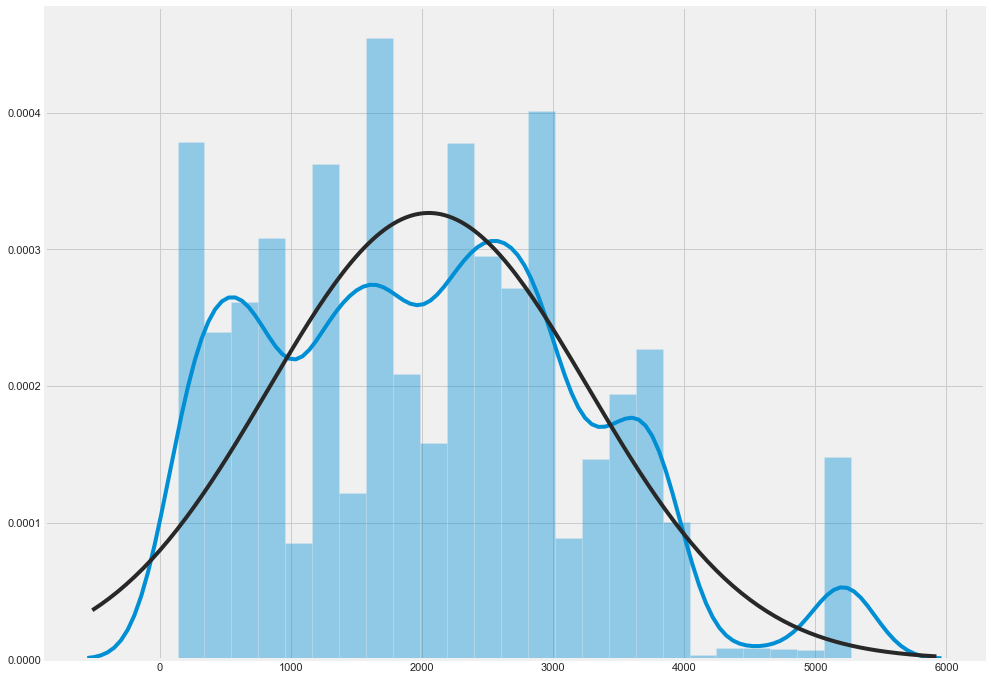

In [1011]:
#histogram
from scipy.stats import norm

sns.distplot(y_pred, fit= norm)